Duplicate key in file '/mnt/lustre/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic

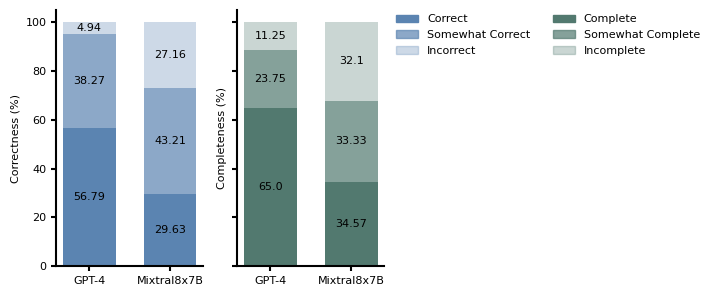

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import os

models = ['GPT-4', 'Mixtral8x7B']
correct = [56.79, 29.63]
somewhat_correct = [38.27, 43.21]
incorrect = [4.94, 27.16]

complete = [65.00, 34.57]
somewhat_complete = [23.75, 33.33]
incomplete = [11.25, 32.10]

colors = ['#5B84B1FF', '#2A4365'] #shades of blue 
colors = ['#5B84B1FF', '#52796F'] 
current_dir = os.path.dirname(os.path.abspath('__file__'))
format_file = os.path.join(current_dir, '.matplotlibrc')
with mpl.rc_context(fname=format_file):
    fig, ax = plt.subplots(1, 2, figsize=(4, 3), sharey=True)
    bar_width = 0.65  # Explicitly set bar width
    # Stacked vertical bar plot for correctness
    bar_correct = ax[0].bar(models, correct, bar_width, color=colors[0], alpha=1.0, label='Correct')
    bar_somewhatcorr = ax[0].bar(models, somewhat_correct, bar_width, bottom=correct, color=colors[0], alpha=0.7, label='Somewhat Correct')
    bar_incorr = ax[0].bar(models, incorrect, bar_width, bottom=[i+j for i, j in zip(correct, somewhat_correct)], color=colors[0], alpha=0.3, label='Incorrect')

    # Add text labels
    for bar, value in zip(bar_correct, correct):
        ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{value}', va='center', ha='center', color='black')
    for bar, value in zip(bar_somewhatcorr, somewhat_correct):
        ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(), f'{value}', va='center', ha='center', color='black')
    for bar, value in zip(bar_incorr, incorrect):
        ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(), f'{value}', va='center', ha='center', color='black')
    ax[0].set_ylabel('Correctness (%)')

    # Stacked vertical bar plot for completeness
    bar_complete = ax[1].bar(models, complete, bar_width, color=colors[1], alpha=1.0, label='Complete')
    bar_somewhatcomp = ax[1].bar(models, somewhat_complete, bar_width, bottom=complete, color=colors[1], alpha=0.7, label='Somewhat Complete')
    bar_incomp = ax[1].bar(models, incomplete, bar_width, bottom=[i+j for i, j in zip(complete, somewhat_complete)], color=colors[1], alpha=0.3, label='Incomplete')

    # Add text labels
    for bar, value in zip(bar_complete, complete):
        ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{value}', va='center', ha='center', color='black')
    for bar, value in zip(bar_somewhatcomp, somewhat_complete):
        ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(), f'{value}', va='center', ha='center', color='black')
    for bar, value in zip(bar_incomp, incomplete):
        ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(), f'{value}', va='center', ha='center', color='black')

    ax[1].set_ylabel('Completeness (%)')

    # Remove box around plots
    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)

    # Adjust layout
    plt.tight_layout()

    # Create legend patches
    patches = [
        mpatches.Patch(color=colors[0], label='Correct', alpha=1.0),
        mpatches.Patch(color=colors[0], label='Somewhat Correct', alpha=0.7),
        mpatches.Patch(color=colors[0], label='Incorrect', alpha=0.3),
        mpatches.Patch(color=colors[1], label='Complete', alpha=1.0),
        mpatches.Patch(color=colors[1], label='Somewhat Complete', alpha=0.7),
        mpatches.Patch(color=colors[1], label='Incomplete', alpha=0.3)
    ]

    # Add the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)

    # Save and show the plot
    #plt.savefig('clinical_corr_comp_transpose.svg')
    plt.show()
